In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
from equations import *

In [2]:
particles = [
        Particle("alpha cen A", 1.1, np.array([-0.5,0,0], dtype="float64"), np.array([0.01,0.01,0], dtype="float64")),
        Particle("alpha cen B", 0.907, np.array([0.5,0,0], dtype="float64"), np.array([-0.05,0,-0.1], dtype="float64")),
        Particle("alpha cen C", 1.0, np.array([0,1,0], dtype="float64"), np.array([0,-0.01,0], dtype="float64"))
]

In [3]:
solutions = run_simulation(particles, 10000)
positions = solutions[:, :3, :]
r1_sol = positions[:, 0, :]  # Positions for body 1
r2_sol = positions[:, 1, :]  # Positions for body 2
r3_sol = positions[:, 2, :]


KeyboardInterrupt



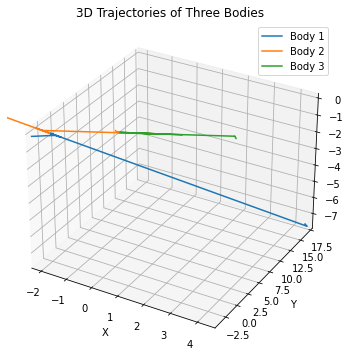

In [5]:
# Create a figure and a 3D axis
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Set axis limits based on the data
ax.set_xlim(np.min(r1_sol[:, 0]), np.max(r1_sol[:, 0]))
ax.set_ylim(np.min(r1_sol[:, 1]), np.max(r1_sol[:, 1]))
ax.set_zlim(np.min(r1_sol[:, 2]), np.max(r1_sol[:, 2]))

# Create empty line objects for the three bodies
line1, = ax.plot([], [], [], label='Body 1')
line2, = ax.plot([], [], [], label='Body 2')
line3, = ax.plot([], [], [], label='Body 3')

# Initialization function (called once)
def init():
    line1.set_data([], [])
    line1.set_3d_properties([])
    line2.set_data([], [])
    line2.set_3d_properties([])
    line3.set_data([], [])
    line3.set_3d_properties([])
    return line1, line2, line3

# Animation function (called for each frame)
def animate(i):
    x1 = r1_sol[:i, 0]
    y1 = r1_sol[:i, 1]
    z1 = r1_sol[:i, 2]

    x2 = r2_sol[:i, 0]
    y2 = r2_sol[:i, 1]
    z2 = r2_sol[:i, 2]

    x3 = r3_sol[:i, 0]
    y3 = r3_sol[:i, 1]
    z3 = r3_sol[:i, 2]

    line1.set_data(x1, y1)
    line1.set_3d_properties(z1)

    line2.set_data(x2, y2)
    line2.set_3d_properties(z2)

    line3.set_data(x3, y3)
    line3.set_3d_properties(z3)

    return line1, line2, line3

# Create the animation
ani = FuncAnimation(fig, animate, init_func=init, frames=len(r1_sol), interval=50, blit=True)

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Trajectories of Three Bodies')

# Add a legend
ax.legend()

# To display the animation in a Jupyter Notebook
from IPython.display import HTML
HTML(ani.to_jshtml())

# To save the animation as a file (e.g., GIF)
# ani.save('three_body_animation.gif', writer='pillow')

# To display the animation in a standalone Python script
# plt.show()
